In [5]:
import pandas as pd
import numpy as np
from collections import deque

Пусть дано слово в некотором алфавите. Определить с помощью LL(1)-анализатора
принадлежит ли данное слово формальному языку, заданному ниже, или нет:
- переменные,
- целочисленные константы,
- true, false,
- арифметические операции,
- логические операции,
- функции,
- предикаты


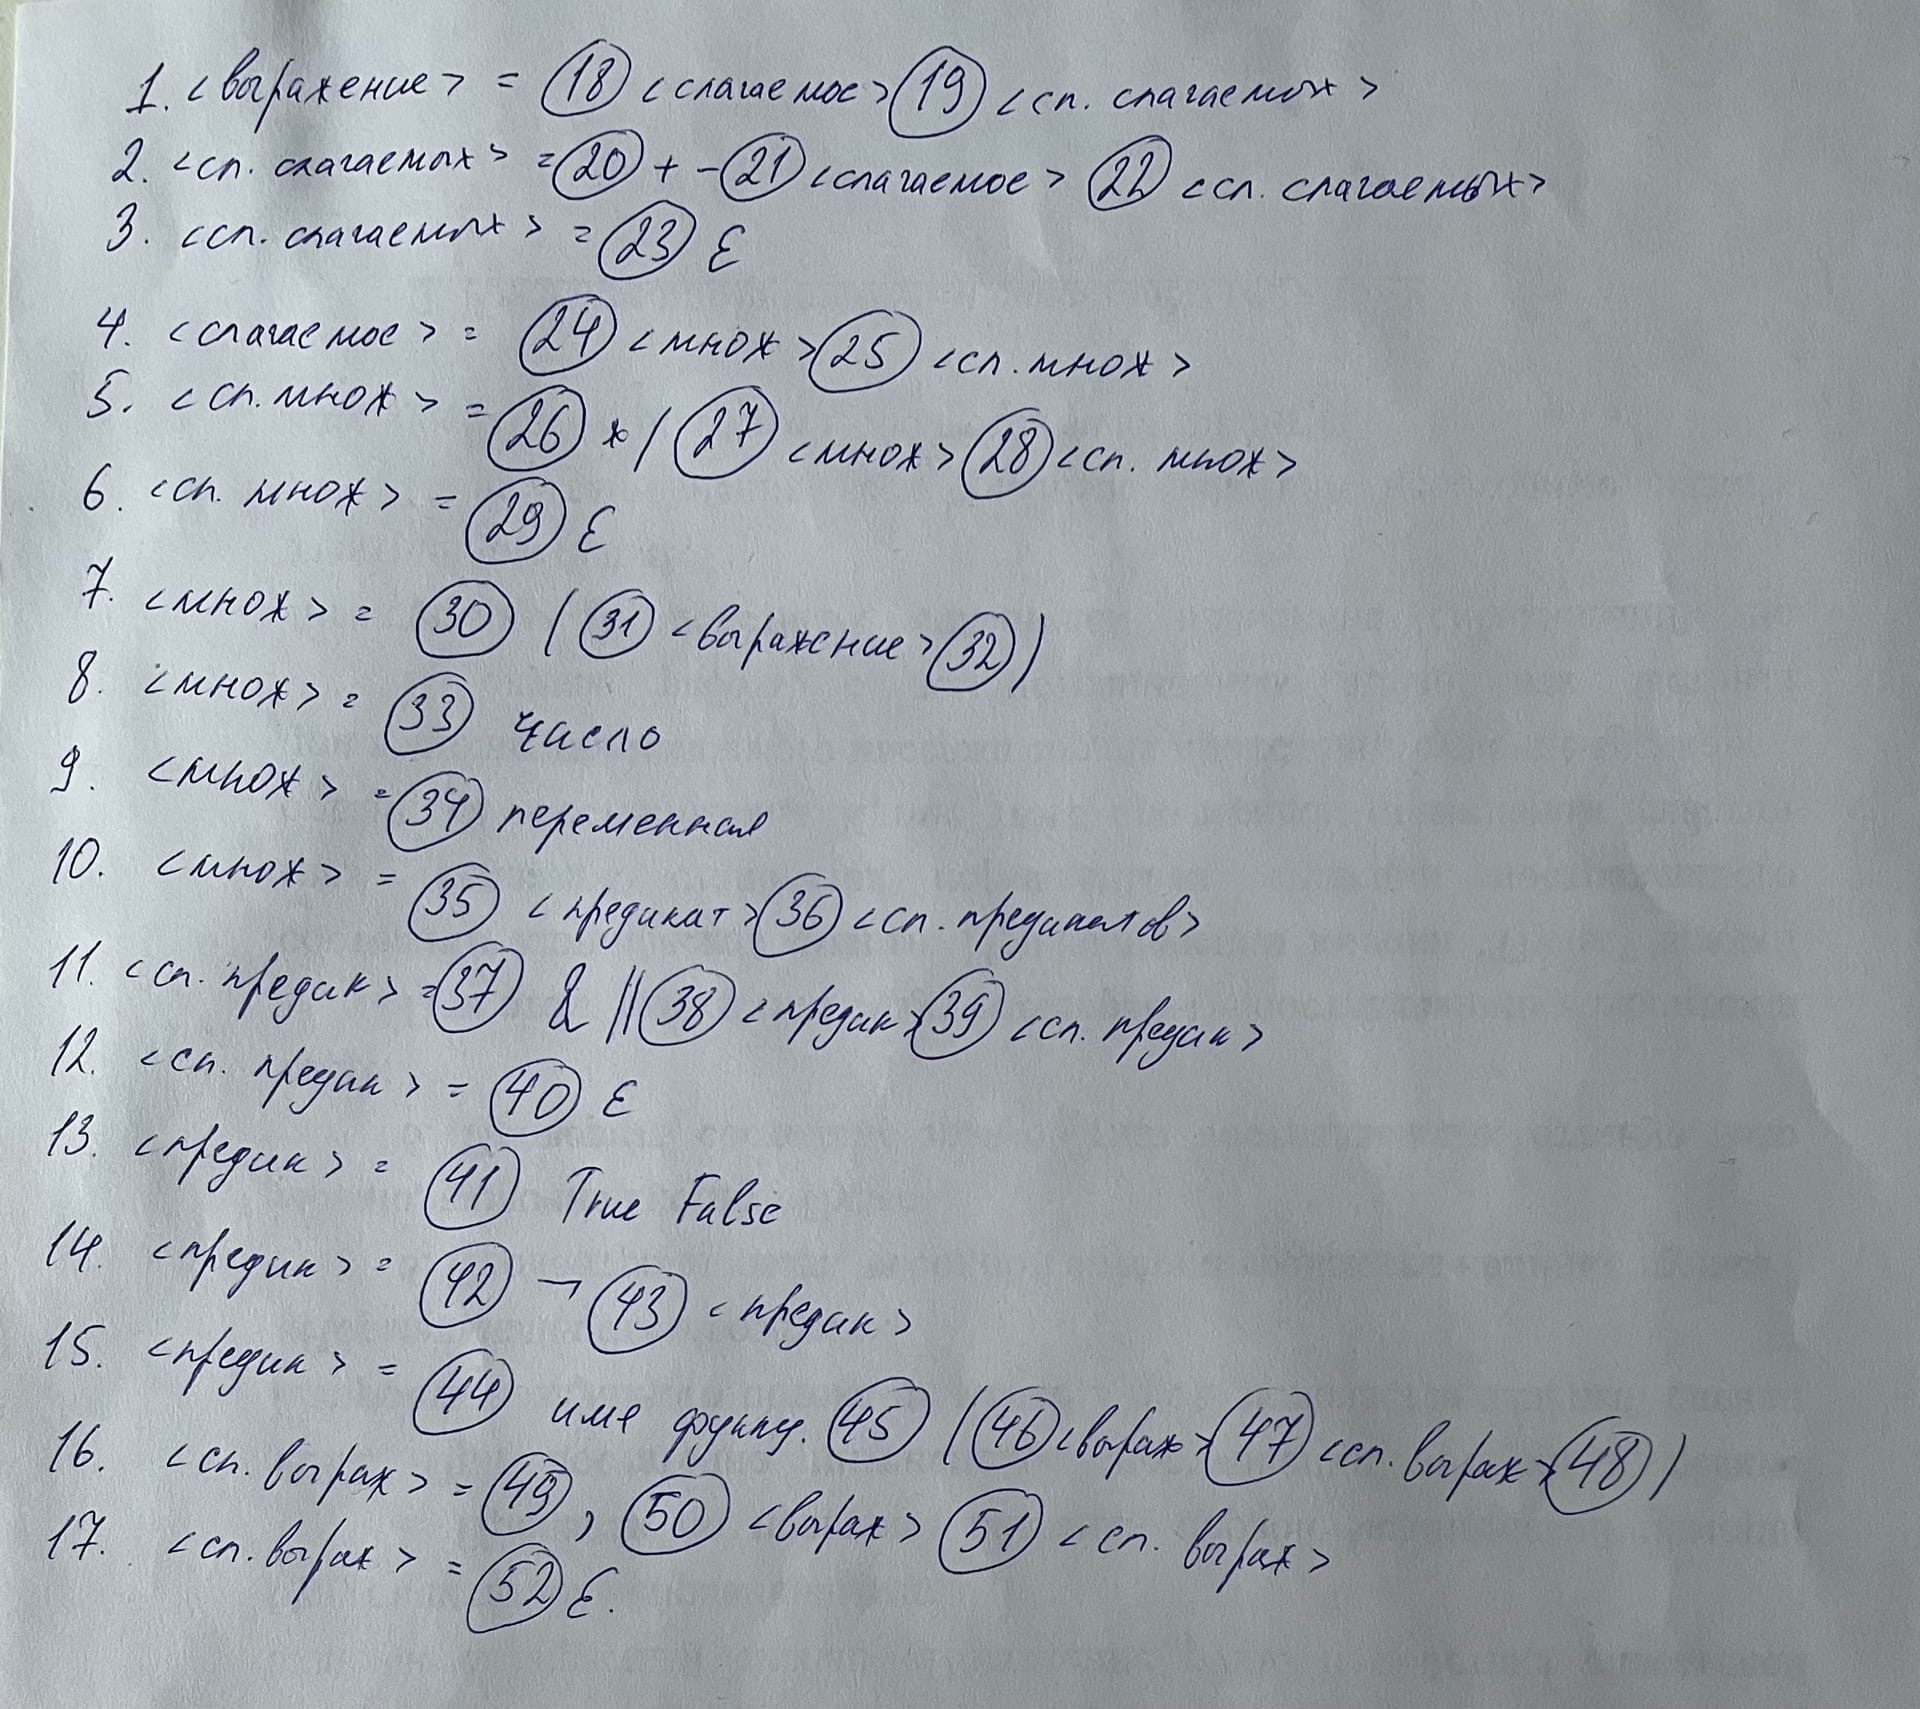

In [6]:
df = pd.read_excel("lab2_table.xlsx", index_col = "№")
df = df.convert_dtypes(int)
df.index = df.index.astype(int)
df

direction  next  stack  return  error  \
№                                                                              
1   etx , ) ( const variable True False not name    18      0       0      1   
2                                            + -    20      0       0      0   
3                                        etx , )    23      0       0      1   
4           ( const variable True False not name    24      0       0      1   
5                                            * /    26      0       0      0   
6                                    + - ) , etx    29      0       0      1   
7                                             (     30      0       0      0   
8                                          const    33      0       0      0   
9                                       variable    34      0       0      0   
10                           True False not name    35      0       0      1   
11                                          & ||    37      0       0      0   
12                               * / + - ) , etx    40      0       0      0   
13                                    True False    41      0       0      0   
14                                           not    42      0       0      0   
15                                          name    44      0       0      1   
16                                             ,    49      0       0      0   
17                                             )    52      0       0      1   
18          ( const variable True False not name     4      1       0      1   
19                                 + -  )  , etx     2      0       0      1   
20                                           + -    21      0       0      1   
21          ( const variable True False not name     4      1       0      1   
22                                 + -  )  , etx     2      0       0      1   
23                                      etx , )     -1      0       1      1   
24          ( const variable True False not name     7      1       0      1   
25                               * / + - ) , etx     5      0       0      1   
26                                          * /     27      0       0      1   
27          ( const variable True False not name     7      1       0      1   
28                               * / + - ) , etx     5      0       0      1   
29                                 + -  )  , etx    -1      0       1      1   
30                                             (    31      0       0      1   
31          ( const variable True False not name     1      1       0      1   
32                                             )    -1      0       1      1   
33                                         const    -1      0       1      1   
34                                      variable    -1      0       1      1   
35                           True False not name    13      1       0      1   
36                          & || * / + - ) , etx    11      0       0      1   
37                                          & ||    38      0       0      1   
38                           True False not name    13      1       0      1   
39                          & || * / + - ) , etx    11      0       0      1   
40                               * / + - ) , etx    -1      0       1      1   
41                                    True False    -1      0       1      1   
42                                           not    43      0       0      1   
43                           True False not name    13      0       0      1   
44                                          name    45      0       0      1   
45                                             (    46      0       0      1   
46  etx , ) ( const variable True False not name     1      1       0      1   
47                                          , )     16      1       0      1   
48                                             )    -1      0       1      1   
49                                     

In [7]:
diction = {}

for i in range(1, df.shape[0]+1):

  diction[i] = []
  
  for j in df.columns:
    diction[i].append(df[j][i])

diction

{1: ['etx , ) ( const variable True False not name', 18, 0, 0, 1, 0],
 2: ['+ -', 20, 0, 0, 0, 0],
 3: ['etx , )', 23, 0, 0, 1, 0],
 4: ['( const variable True False not name', 24, 0, 0, 1, 0],
 5: ['* /', 26, 0, 0, 0, 0],
 6: ['+ - ) , etx', 29, 0, 0, 1, 0],
 7: ['( ', 30, 0, 0, 0, 0],
 8: ['const', 33, 0, 0, 0, 0],
 9: ['variable', 34, 0, 0, 0, 0],
 10: ['True False not name', 35, 0, 0, 1, 0],
 11: ['& ||', 37, 0, 0, 0, 0],
 12: ['* / + - ) , etx', 40, 0, 0, 0, 0],
 13: ['True False', 41, 0, 0, 0, 0],
 14: ['not', 42, 0, 0, 0, 0],
 15: ['name', 44, 0, 0, 1, 0],
 16: [',', 49, 0, 0, 0, 0],
 17: [')', 52, 0, 0, 1, 0],
 18: ['( const variable True False not name', 4, 1, 0, 1, 0],
 19: [' + -  )  , etx', 2, 0, 0, 1, 0],
 20: ['+ -', 21, 0, 0, 1, 1],
 21: ['( const variable True False not name', 4, 1, 0, 1, 0],
 22: [' + -  )  , etx', 2, 0, 0, 1, 0],
 23: ['etx , ) ', -1, 0, 1, 1, 0],
 24: ['( const variable True False not name', 7, 1, 0, 1, 0],
 25: ['* / + - ) , etx', 5, 0, 0, 1, 0],
 2

In [8]:
def LL1(sentence):

  n = 1
  word = sentence.split()
  word.append("etx") # end of the text
  stask_memory = deque()

  for i in range(len(word)):
    
    symbol = word[i]



    print("Считываемый символ: ", symbol)

    all_symbols = [',', ')', '(', 'True', 'False', '*', '/', '+', '-', '&', '||', 'not', 'etx', 'const', 'name']
    is_accept,  is_error, is_end_symbol = False, False, False

    while not(is_accept) or not(is_error) or not(is_end_symbol) :
      print(n, " -> ")

      is_end_symbol = (symbol == "etx" and (symbol in diction[n][0]) and len(stask_memory) == 0)

      symbol = ("const" if symbol.isdigit() else symbol)

      
      if i != len(word)-1 and (symbol not in all_symbols):
        symbol = ("name" if ((word[i+1] == '(')) else symbol)
      
      
      symbol = ("variable" if symbol not in all_symbols else symbol)
      
      if ((symbol in diction[n][0]) and not(is_end_symbol)):
        
        new_n = n
        if diction[n][3] ==  1: # Return
          print(n, "Взято из стека")
          new_n = stask_memory.pop()
          print(stask_memory)
        else:
          new_n = diction[n][1]
        
        if diction[n][2] ==  1: # Stack
          print(n, "Записано в стек")
          stask_memory.append(n+1)
          print(stask_memory)
        
        if diction[n][5] ==  1: # Accept
          is_accept = True
          print(n, "-------- Принято")
          n = new_n
          break

        n = new_n

      elif is_end_symbol:
        break
      # Error
      elif diction[n][4] ==  0:
          n += 1
      else: 
        is_error = True;
        break
    
    if is_error: 
      print("---!Error!---")
      break

    if is_end_symbol:
      print("--------------------------------------------") 
      print("Слово '{}' принадлежит данному формальному языку".format(sentence))
      break

## Проверка на примерах

In [9]:
LL1("( 17 - 10 ) / 2 * 228")

Считываемый символ:  (
1  -> 
18  -> 
18 Записано в стек
deque([19])
4  -> 
24  -> 
24 Записано в стек
deque([19, 25])
7  -> 
30  -> 
30 -------- Принято
Считываемый символ:  17
31  -> 
31 Записано в стек
deque([19, 25, 32])
1  -> 
18  -> 
18 Записано в стек
deque([19, 25, 32, 19])
4  -> 
24  -> 
24 Записано в стек
deque([19, 25, 32, 19, 25])
7  -> 
8  -> 
33  -> 
33 Взято из стека
deque([19, 25, 32, 19])
33 -------- Принято
Считываемый символ:  -
25  -> 
5  -> 
6  -> 
29  -> 
29 Взято из стека
deque([19, 25, 32])
19  -> 
2  -> 
20  -> 
20 -------- Принято
Считываемый символ:  10
21  -> 
21 Записано в стек
deque([19, 25, 32, 22])
4  -> 
24  -> 
24 Записано в стек
deque([19, 25, 32, 22, 25])
7  -> 
8  -> 
33  -> 
33 Взято из стека
deque([19, 25, 32, 22])
33 -------- Принято
Считываемый символ:  )
25  -> 
5  -> 
6  -> 
29  -> 
29 Взято из стека
deque([19, 25, 32])
22  -> 
2  -> 
3  -> 
23  -> 
23 Взято из стека
deque([19, 25])
32  -> 
32 Взято из стека
deque([19])
32 -------- Принято
Счи

In [10]:
LL1('cos ( x )')

Считываемый символ:  cos
1  -> 
18  -> 
18 Записано в стек
deque([19])
4  -> 
24  -> 
24 Записано в стек
deque([19, 25])
7  -> 
8  -> 
9  -> 
10  -> 
35  -> 
35 Записано в стек
deque([19, 25, 36])
13  -> 
14  -> 
15  -> 
44  -> 
44 -------- Принято
Считываемый символ:  (
45  -> 
45 -------- Принято
Считываемый символ:  x
46  -> 
46 Записано в стек
deque([19, 25, 36, 47])
1  -> 
18  -> 
18 Записано в стек
deque([19, 25, 36, 47, 19])
4  -> 
24  -> 
24 Записано в стек
deque([19, 25, 36, 47, 19, 25])
7  -> 
8  -> 
9  -> 
34  -> 
34 Взято из стека
deque([19, 25, 36, 47, 19])
34 -------- Принято
Считываемый символ:  )
25  -> 
5  -> 
6  -> 
29  -> 
29 Взято из стека
deque([19, 25, 36, 47])
19  -> 
2  -> 
3  -> 
23  -> 
23 Взято из стека
deque([19, 25, 36])
47  -> 
47 Записано в стек
deque([19, 25, 36, 48])
16  -> 
17  -> 
52  -> 
52 Взято из стека
deque([19, 25, 36])
48  -> 
48 Взято из стека
deque([19, 25])
48 -------- Принято
Считываемый символ:  etx
36  -> 
11  -> 
12  -> 
40  -> 
40 Взято

In [11]:
LL1("cos ( 15 ) & not False")

Считываемый символ:  cos
1  -> 
18  -> 
18 Записано в стек
deque([19])
4  -> 
24  -> 
24 Записано в стек
deque([19, 25])
7  -> 
8  -> 
9  -> 
10  -> 
35  -> 
35 Записано в стек
deque([19, 25, 36])
13  -> 
14  -> 
15  -> 
44  -> 
44 -------- Принято
Считываемый символ:  (
45  -> 
45 -------- Принято
Считываемый символ:  15
46  -> 
46 Записано в стек
deque([19, 25, 36, 47])
1  -> 
18  -> 
18 Записано в стек
deque([19, 25, 36, 47, 19])
4  -> 
24  -> 
24 Записано в стек
deque([19, 25, 36, 47, 19, 25])
7  -> 
8  -> 
33  -> 
33 Взято из стека
deque([19, 25, 36, 47, 19])
33 -------- Принято
Считываемый символ:  )
25  -> 
5  -> 
6  -> 
29  -> 
29 Взято из стека
deque([19, 25, 36, 47])
19  -> 
2  -> 
3  -> 
23  -> 
23 Взято из стека
deque([19, 25, 36])
47  -> 
47 Записано в стек
deque([19, 25, 36, 48])
16  -> 
17  -> 
52  -> 
52 Взято из стека
deque([19, 25, 36])
48  -> 
48 Взято из стека
deque([19, 25])
48 -------- Принято
Считываемый символ:  &
36  -> 
11  -> 
37  -> 
37 -------- Принято
Счит

In [12]:
LL1(" tg ( x ) & sin ( y )")

Считываемый символ:  tg
1  -> 
18  -> 
18 Записано в стек
deque([19])
4  -> 
24  -> 
24 Записано в стек
deque([19, 25])
7  -> 
8  -> 
9  -> 
10  -> 
35  -> 
35 Записано в стек
deque([19, 25, 36])
13  -> 
14  -> 
15  -> 
44  -> 
44 -------- Принято
Считываемый символ:  (
45  -> 
45 -------- Принято
Считываемый символ:  x
46  -> 
46 Записано в стек
deque([19, 25, 36, 47])
1  -> 
18  -> 
18 Записано в стек
deque([19, 25, 36, 47, 19])
4  -> 
24  -> 
24 Записано в стек
deque([19, 25, 36, 47, 19, 25])
7  -> 
8  -> 
9  -> 
34  -> 
34 Взято из стека
deque([19, 25, 36, 47, 19])
34 -------- Принято
Считываемый символ:  )
25  -> 
5  -> 
6  -> 
29  -> 
29 Взято из стека
deque([19, 25, 36, 47])
19  -> 
2  -> 
3  -> 
23  -> 
23 Взято из стека
deque([19, 25, 36])
47  -> 
47 Записано в стек
deque([19, 25, 36, 48])
16  -> 
17  -> 
52  -> 
52 Взято из стека
deque([19, 25, 36])
48  -> 
48 Взято из стека
deque([19, 25])
48 -------- Принято
Считываемый символ:  &
36  -> 
11  -> 
37  -> 
37 -------- Принято

In [13]:
LL1('True || False ')

Считываемый символ:  True
1  -> 
18  -> 
18 Записано в стек
deque([19])
4  -> 
24  -> 
24 Записано в стек
deque([19, 25])
7  -> 
8  -> 
9  -> 
10  -> 
35  -> 
35 Записано в стек
deque([19, 25, 36])
13  -> 
41  -> 
41 Взято из стека
deque([19, 25])
41 -------- Принято
Считываемый символ:  ||
36  -> 
11  -> 
37  -> 
37 -------- Принято
Считываемый символ:  False
38  -> 
38 Записано в стек
deque([19, 25, 39])
13  -> 
41  -> 
41 Взято из стека
deque([19, 25])
41 -------- Принято
Считываемый символ:  etx
39  -> 
11  -> 
12  -> 
40  -> 
40 Взято из стека
deque([19])
25  -> 
5  -> 
6  -> 
29  -> 
29 Взято из стека
deque([])
19  -> 
--------------------------------------------
Слово 'True || False ' принадлежит данному формальному языку
